In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem, ttest_ind

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_pd = pd.read_csv(mouse_drug_data_to_load)
#print(mouse_drug_data_pd)

clinical_trial_data_pd = pd.read_csv(clinical_trial_data_to_load)
#print(clinical_trial_data_pd)

host_drug_trial_data_pd = pd.merge(mouse_drug_data_pd, clinical_trial_data_pd, on="Mouse ID")

# Break the data into Drug datasets
drug_list = list(set(mouse_drug_data_pd['Drug']))
drug_count = len(drug_list)
#print(drug_list)
drug_trial_data_df = pd.DataFrame(host_drug_trial_data_pd)
drug_trial_data = drug_trial_data_df["Mouse ID"].value_counts()

mouse_drug_data_df = pd.DataFrame(mouse_drug_data_pd)

clinical_trial_data_df = pd.DataFrame(clinical_trial_data_pd)
trial_data = clinical_trial_data_df["Mouse ID"].value_counts()
trial_duration = clinical_trial_data_df["Timepoint"].max()
unique_trial_intervals_df = clinical_trial_data_df.drop_duplicates(["Timepoint"])
trial_intervals = unique_trial_intervals_df["Timepoint"].count()
results_header_num = (trial_intervals - 1) * 2 # Show first two sets of results
test_interval = int(trial_duration / (trial_intervals - 1))

initial_volume = int(clinical_trial_data_df["Tumor Volume (mm3)"].mode())
initial_volume = "{0:0,.2f}".format(initial_volume)
minimum_final_volume = clinical_trial_data_df["Tumor Volume (mm3)"].min()
minimum_final_volume = "{0:0,.2f}".format(minimum_final_volume)
mean_final_volume = clinical_trial_data_df["Tumor Volume (mm3)"].mean()
mean_final_volume = "{0:0,.2f}".format(mean_final_volume)
maximum_final_volume = clinical_trial_data_df["Tumor Volume (mm3)"].max()
maximum_final_volume = "{0:0,.2f}".format(maximum_final_volume)

# Display trial overview
print("Pymaceuticals Inc - Squamous Cell Carcinoma (SCC) Study Drug Trials")
print("___________________________________________________________________\n")
print(f"Drug Name Hosts Tested")
print("_________ ____________")
print(mouse_drug_data_df['Drug'].value_counts())

mouse_list = list(set(mouse_drug_data_pd['Mouse ID']))
mouse_count = len(mouse_list) + 1
print("______________________")
print(f"Trial Drug Count: {drug_count}")
print(f"Total Hosts Tested: {mouse_count}\n")

print("Trial Start Conditions")
print("______________________")
print(f"Initial Tumor Volume (mm3) @ Time Point Zero: {initial_volume}")
print(f"Time Point Test Interval (days): {test_interval}\n")

print("Trial End Conditions")
print("____________________")
print(f"Time Point Tests Per Drug Trial (Max Intervals): {trial_intervals}")
print(f"Trial Duration (Max Days): {trial_duration}")
print(f"Minimum Final Tumor Volume (mm3): {minimum_final_volume}")
print(f"Mean Final Tumor Volume (mm3): {mean_final_volume}")
print(f"Maximum Final Tumor Volume (mm3): {maximum_final_volume}\n")
print(host_drug_trial_data_pd.describe())
print("")
print(mouse_drug_data_df.describe())
print("")
print(f"Hosts Exceeding Maximum Number of {trial_intervals} Interval Tests:")
print(f"HostID #Tests")
print("______ ______")
print(trial_data.head(1))

results_total_num = len(drug_trial_data_df)
# Need to remove all tests that where the same mouse (g989) is tested with more than one drug
# as it is not apparent which test results are for which drugs
drug_trial_data_df = drug_trial_data_df.drop(drug_trial_data_df[drug_trial_data_df['Mouse ID'] == "g989"].index)
rejected_rows = int((results_total_num - len(drug_trial_data_df)) / 2)
updated_results_total_num = len(drug_trial_data_df)
print(f"Rejected {rejected_rows} Test Rows of {updated_results_total_num + rejected_rows} Total Test Rows\n")
print("Drug Trial Results")
print("__________________")
print(f"First {results_header_num} Test Rows of {updated_results_total_num} Total Test Rows\n")
drug_trial_data_df.head(results_header_num)

Pymaceuticals Inc - Squamous Cell Carcinoma (SCC) Study Drug Trials
___________________________________________________________________

Drug Name Hosts Tested
_________ ____________
Ketapril     25
Naftisol     25
Ramicane     25
Propriva     25
Stelasyn     25
Ceftamin     25
Infubinol    25
Placebo      25
Zoniferol    25
Capomulin    25
Name: Drug, dtype: int64
______________________
Trial Drug Count: 10
Total Hosts Tested: 250

Trial Start Conditions
______________________
Initial Tumor Volume (mm3) @ Time Point Zero: 45.00
Time Point Test Interval (days): 5

Trial End Conditions
____________________
Time Point Tests Per Drug Trial (Max Intervals): 10
Trial Duration (Max Days): 45
Minimum Final Tumor Volume (mm3): 22.05
Mean Final Tumor Volume (mm3): 50.46
Maximum Final Tumor Volume (mm3): 78.57

         Timepoint  Tumor Volume (mm3)  Metastatic Sites
count  1906.000000         1906.000000       1906.000000
mean     19.538300           50.468120          1.018363
std      14.0647

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

        Name  Tests                                           Means  \
0    Placebo    181  Tumor Volume (mm3)    54.033581
dtype: float64   
1  Capomulin    230  Tumor Volume (mm3)    40.675741
dtype: float64   
2   Ramicane    228  Tumor Volume (mm3)    40.216745
dtype: float64   
3   Ketapril    188  Tumor Volume (mm3)    55.235638
dtype: float64   
4   Naftisol    186  Tumor Volume (mm3)    54.331565
dtype: float64   
5  Zoniferol    182  Tumor Volume (mm3)    53.236507
dtype: float64   
6   Stelasyn    181  Tumor Volume (mm3)    54.233149
dtype: float64   
7   Ceftamin    178  Tumor Volume (mm3)    52.591172
dtype: float64   
8  Infubinol    178  Tumor Volume (mm3)    52.957935
dtype: float64   
9   Propriva    148   Tumor Volume (mm3)    52.32093
dtype: float64   

                    Sems  
0   [0.5813305510484215]  
1  [0.32934562342391865]  
2  [0.32095460652901503]  
3   [0.6038598237767487]  
4   [0.5964657512206463]  
5   [0.5163978968175721]  
6   [0.5731109332734033]  
7 

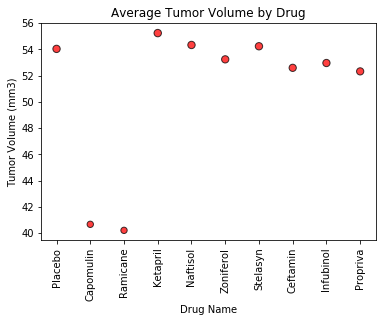

In [10]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

Placebo = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Placebo", ["Tumor Volume (mm3)"]]
Placebo_mean = np.mean(Placebo)
Placebo_sem = sem(Placebo)
Placebo_num = len(Placebo)

Capomulin = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Capomulin", ["Tumor Volume (mm3)"]]
Capomulin_mean = np.mean(Capomulin)
Capomulin_sem = sem(Capomulin)
Capomulin_num = len(Capomulin)

Ramicane = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Ramicane", ["Tumor Volume (mm3)"]]
Ramicane_mean = np.mean(Ramicane)
Ramicane_sem = sem(Ramicane)
Ramicane_num = len(Ramicane)

Ketapril = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Ketapril", ["Tumor Volume (mm3)"]]
Ketapril_mean = np.mean(Ketapril)
Ketapril_sem = sem(Ketapril)
Ketapril_num = len(Ketapril)

Naftisol = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Naftisol", ["Tumor Volume (mm3)"]]
Naftisol_mean = np.mean(Naftisol)
Naftisol_sem = sem(Naftisol)
Naftisol_num = len(Naftisol)

Zoniferol = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Zoniferol", ["Tumor Volume (mm3)"]]
Zoniferol_mean = np.mean(Zoniferol)
Zoniferol_sem = sem(Zoniferol)
Zoniferol_num = len(Zoniferol)

Stelasyn = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Stelasyn", ["Tumor Volume (mm3)"]]
Stelasyn_mean = np.mean(Stelasyn)
Stelasyn_sem = sem(Stelasyn)
Stelasyn_num = len(Stelasyn)

Ceftamin = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Ceftamin", ["Tumor Volume (mm3)"]]
Ceftamin_mean = np.mean(Ceftamin)
Ceftamin_sem = sem(Ceftamin)
Ceftamin_num = len(Ceftamin)

Infubinol = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Infubinol", ["Tumor Volume (mm3)"]]
Infubinol_mean = np.mean(Infubinol)
Infubinol_sem = sem(Infubinol)
Infubinol_num = len(Infubinol)

Propriva = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Propriva", ["Tumor Volume (mm3)"]]
Propriva_mean = np.mean(Propriva)
Propriva_sem = sem(Propriva)
Propriva_num = len(Propriva)

Drug_Names = ['Placebo', 'Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva']   
Drug_Tests = [Placebo_num, Capomulin_num, Ramicane_num, Ketapril_num, Naftisol_num, Zoniferol_num, Stelasyn_num, Ceftamin_num, Infubinol_num, Propriva_num]
Drug_Means = [Placebo_mean, Capomulin_mean, Ramicane_mean, Ketapril_mean, Naftisol_mean, Zoniferol_mean, Stelasyn_mean, Ceftamin_mean, Infubinol_mean, Propriva_mean]
Drug_Sems = [Placebo_sem, Capomulin_sem, Ramicane_sem, Ketapril_sem, Naftisol_sem, Zoniferol_sem, Stelasyn_sem, Ceftamin_sem, Infubinol_sem, Propriva_sem]
drug_stats = {'Name': Drug_Names, 'Tests': Drug_Tests, 'Means': Drug_Means, 'Sems': Drug_Sems}
# Convert to DataFrame
Drug_Stats_df = pd.DataFrame(drug_stats)
#Drug_Stats_df = Drug_Stats_df.sort_values(['Tests'], ascending=False)
#Drug_Stats_df.reset_index(inplace=True)
# Preview DataFrame
print(Drug_Stats_df)
plt.title("Average Tumor Volume by Drug")
plt.xlabel("Drug Name")
plt.ylabel("Tumor Volume (mm3)")
data = [value for value in Drug_Means]
x_axis = np.arange(0.5, len(Drug_Means) + 0.5, 1)
tick_locations = [ticker for ticker in x_axis]
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", s=data, alpha=0.75)
plt.xticks(tick_locations, Drug_Stats_df["Name"], rotation="vertical")
plt.show()
#plt.savefig("Avg_Tumor_Volume_By_Drug.png")

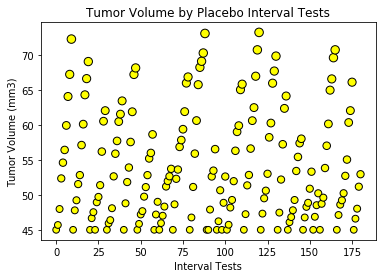

In [11]:

plt.title("Tumor Volume by Placebo Interval Tests")
x1_timepoints = np.arange(0, Placebo_num)
plt.scatter(x1_timepoints, Placebo, marker="o", facecolors="yellow", edgecolors="black", s=Placebo, label="Placebo")
#plt.hist2d(Placebo_all,Placebo_all,bins=181)
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
#plt.savefig("Placebo_Tumor_Volume.png")

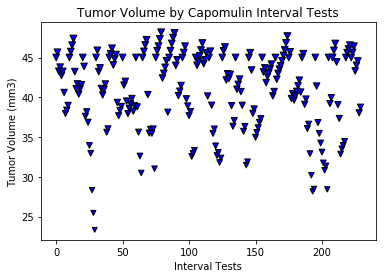

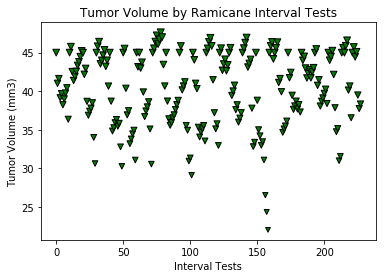

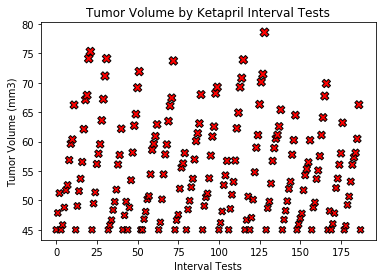

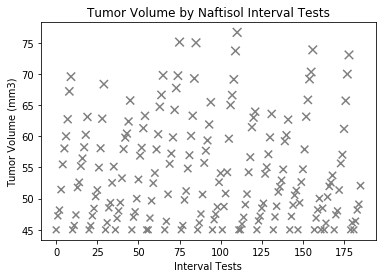

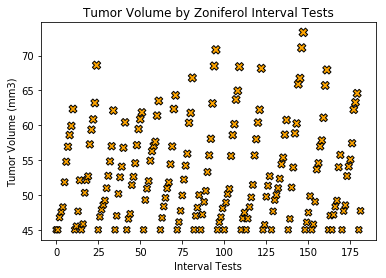

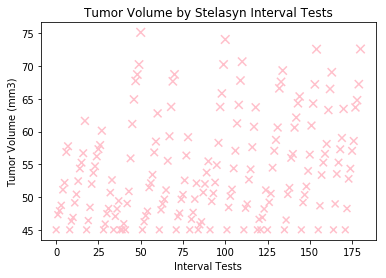

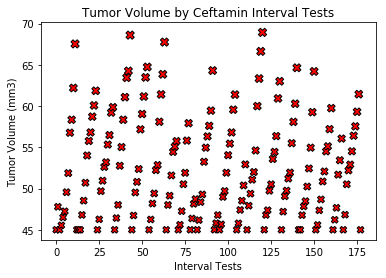

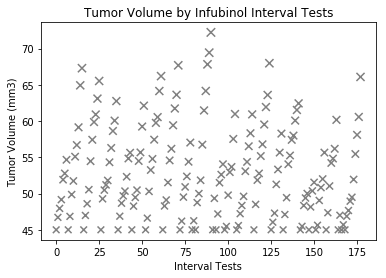

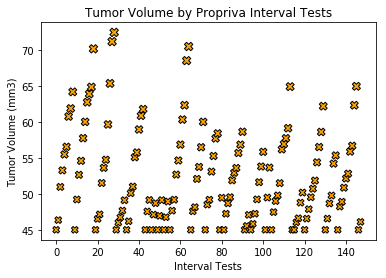

In [36]:


plt.title("Tumor Volume by Capomulin Interval Tests")
x2_timepoints = np.arange(0, Capomulin_num)
plt.scatter(x2_timepoints, Capomulin, marker="v", facecolors="blue", edgecolors="black", s=Capomulin, label="Capomulin")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.title("Tumor Volume by Ramicane Interval Tests")
x2_timepoints = np.arange(0, Ramicane_num)
plt.scatter(x2_timepoints, Ramicane, marker="v", facecolors="green", edgecolors="black", s=Ramicane, label="Ramicane")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.title("Tumor Volume by Ketapril Interval Tests")
x2_timepoints = np.arange(0, Ketapril_num)
plt.scatter(x2_timepoints, Ketapril, marker="X", facecolors="red", edgecolors="black", s=Ketapril, label="Ketapril")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.title("Tumor Volume by Naftisol Interval Tests")
x1_timepoints = np.arange(0, Naftisol_num)
plt.scatter(x1_timepoints, Naftisol, marker="x", facecolors="grey", edgecolors="black", s=Naftisol, label="Naftisol")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.title("Tumor Volume by Zoniferol Interval Tests")
x2_timepoints = np.arange(0, Zoniferol_num)
plt.scatter(x2_timepoints, Zoniferol, marker="X", facecolors="orange", edgecolors="black", s=Zoniferol, label="Zoniferol")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.title("Tumor Volume by Stelasyn Interval Tests")
x1_timepoints = np.arange(0, Stelasyn_num)
plt.scatter(x1_timepoints, Stelasyn, marker="x", facecolors="pink", edgecolors="black", s=Stelasyn, label="Stelasyn")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.title("Tumor Volume by Ceftamin Interval Tests")
x2_timepoints = np.arange(0, Ceftamin_num)
plt.scatter(x2_timepoints, Ceftamin, marker="X", facecolors="red", edgecolors="black", s=Ceftamin, label="Ceftamin")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.title("Tumor Volume by Infubinol Interval Tests")
x1_timepoints = np.arange(0, Infubinol_num)
plt.scatter(x1_timepoints, Infubinol, marker="x", facecolors="grey", edgecolors="black", s=Infubinol, label="Infubinol")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

plt.title("Tumor Volume by Propriva Interval Tests")
x2_timepoints = np.arange(0, Propriva_num)
plt.scatter(x2_timepoints, Propriva, marker="X", facecolors="orange", edgecolors="black", s=Propriva, label="Propriva")
plt.xlabel("Interval Tests")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



## Metastatic Response to Treatment

   Metastatic Sites
0          1.441989
1          0.713043
2          0.548246
3          1.297872
4          1.182796
5          1.230769
6          0.872928
7          1.179775
8          0.960674
9          1.013514


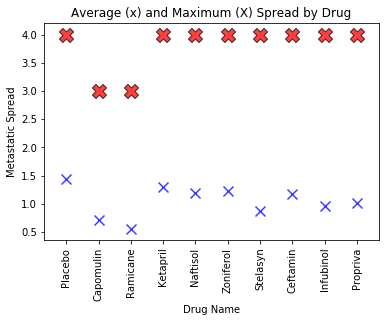

In [55]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Placebo_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Placebo", ["Metastatic Sites"]]
Placebo_mean_spread = np.mean(Placebo_spread)
Placebo_max_spread = np.max(Placebo_spread)

Capomulin_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Capomulin", ["Metastatic Sites"]]
Capomulin_mean_spread = np.mean(Capomulin_spread)
Capomulin_max_spread = np.max(Capomulin_spread)

Ramicane_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Ramicane", ["Metastatic Sites"]]
Ramicane_mean_spread = np.mean(Ramicane_spread)
Ramicane_max_spread = np.max(Ramicane_spread)

Ketapril_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Ketapril", ["Metastatic Sites"]]
Ketapril_mean_spread = np.mean(Ketapril_spread)
Ketapril_max_spread = np.max(Ketapril_spread)

Naftisol_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Naftisol", ["Metastatic Sites"]]
Naftisol_mean_spread = np.mean(Naftisol_spread)
Naftisol_max_spread = np.max(Naftisol_spread)

Zoniferol_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Zoniferol", ["Metastatic Sites"]]
Zoniferol_mean_spread = np.mean(Zoniferol_spread)
Zoniferol_max_spread = np.max(Zoniferol_spread)

Stelasyn_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Stelasyn", ["Metastatic Sites"]]
Stelasyn_mean_spread = np.mean(Stelasyn_spread)
Stelasyn_max_spread = np.max(Stelasyn_spread)

Ceftamin_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Ceftamin", ["Metastatic Sites"]]
Ceftamin_mean_spread = np.mean(Ceftamin_spread)
Ceftamin_max_spread = np.max(Ceftamin_spread)

Infubinol_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Infubinol", ["Metastatic Sites"]]
Infubinol_mean_spread = np.mean(Infubinol_spread)
Infubinol_max_spread = np.max(Infubinol_spread)

Propriva_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Propriva", ["Metastatic Sites"]]
Propriva_mean_spread = np.mean(Propriva_spread)
Propriva_max_spread = np.max(Propriva_spread)


# Convert to DataFrame
Drug_Means_spread = [Placebo_mean_spread, Capomulin_mean_spread, Ramicane_mean_spread, Ketapril_mean_spread, Naftisol_mean_spread, Zoniferol_mean_spread, Stelasyn_mean_spread, Ceftamin_mean_spread, Infubinol_mean_spread, Propriva_mean_spread]
Drug_Spread_df = pd.DataFrame(Drug_Means_spread)
Drug_Maxs_spread = [Placebo_max_spread, Capomulin_max_spread, Ramicane_max_spread, Ketapril_max_spread, Naftisol_max_spread, Zoniferol_max_spread, Stelasyn_max_spread, Ceftamin_max_spread, Infubinol_max_spread, Propriva_max_spread]
Drug_Maxs_df = pd.DataFrame(Drug_Maxs_spread)


# Preview DataFrame
print(Drug_Spread_df)
plt.title("Average (x) and Maximum (X) Spread by Drug")
plt.xlabel("Drug Name")
plt.ylabel("Metastatic Spread")
mean_spread_data = [value for value in Drug_Means_spread]
max_spread_data = [value for value in Drug_Maxs_spread]
x_axis = np.arange(0, len(mean_spread_data), 1)
tick_locations = [ticker for ticker in x_axis]
plt.scatter(x_axis, mean_spread_data, marker="x", facecolors="blue", edgecolors="black", s=100, alpha=0.75)
plt.scatter(x_axis, max_spread_data, marker="X", facecolors="red", edgecolors="black", s=200, alpha=0.75)
plt.xticks(tick_locations, Drug_Names, rotation="vertical")
plt.show()

## Survival Rates

In [53]:
Placebo_all = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Placebo", ["Timepoint"]]
Placebo_0 = int(Placebo_all.loc[Placebo_all["Timepoint"] == 0, ].count())
Placebo_45 = int(Placebo_all.loc[Placebo_all["Timepoint"] == 45, ].count())
Placebo_Survival_Rate = Placebo_45 / Placebo_0 * 100
print(f"Placebo: {Placebo_45} of the {Placebo_0} ({Placebo_Survival_Rate}%) test hosts survived 45 days")

Capomulin_all = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Capomulin", ["Timepoint"]]
Capomulin_0 = int(Capomulin_all.loc[Capomulin_all["Timepoint"] == 0, ].count())
Capomulin_45 = int(Capomulin_all.loc[Capomulin_all["Timepoint"] == 45, ].count())
Capomulin_Survival_Rate = Capomulin_45 / Capomulin_0 * 100
print(f"Capomulin: {Capomulin_45} of the {Capomulin_0} ({Capomulin_Survival_Rate}%) test hosts survived 45 days")

Ramicane_all = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Ramicane", ["Timepoint"]]
Ramicane_0 = int(Ramicane_all.loc[Ramicane_all["Timepoint"] == 0, ].count())
Ramicane_45 = int(Ramicane_all.loc[Ramicane_all["Timepoint"] == 45, ].count())
Ramicane_Survival_Rate = Ramicane_45 / Ramicane_0 * 100
print(f"Ramicane: {Ramicane_45} of the {Ramicane_0} ({Ramicane_Survival_Rate}%) test hosts survived 45 days")

Ketapril_all = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Ketapril", ["Timepoint"]]
Ketapril_0 = int(Ketapril_all.loc[Ketapril_all["Timepoint"] == 0, ].count())
Ketapril_45 = int(Ketapril_all.loc[Ketapril_all["Timepoint"] == 45, ].count())
Ketapril_Survival_Rate = Ketapril_45 / Ketapril_0 * 100
print(f"Ketapril: {Ketapril_45} of the {Ketapril_0} ({Ketapril_Survival_Rate}%) test hosts survived 45 days")

Naftisol_all = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Naftisol", ["Timepoint"]]
Naftisol_0 = int(Naftisol_all.loc[Naftisol_all["Timepoint"] == 0, ].count())
Naftisol_45 = int(Naftisol_all.loc[Naftisol_all["Timepoint"] == 45, ].count())
Naftisol_Survival_Rate = Naftisol_45 / Naftisol_0 * 100
print(f"Naftisol: {Naftisol_45} of the {Naftisol_0} ({Naftisol_Survival_Rate}%) test hosts survived 45 days")

Zoniferol_all = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Zoniferol", ["Timepoint"]]
Zoniferol_0 = int(Zoniferol_all.loc[Zoniferol_all["Timepoint"] == 0, ].count())
Zoniferol_45 = int(Zoniferol_all.loc[Zoniferol_all["Timepoint"] == 45, ].count())
Zoniferol_Survival_Rate = Zoniferol_45 / Zoniferol_0 * 100
print(f"Zoniferol: {Zoniferol_45} of the {Zoniferol_0} ({Zoniferol_Survival_Rate}%) test hosts survived 45 days")

Stelasyn_all = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Stelasyn", ["Timepoint"]]
Stelasyn_0 = int(Stelasyn_all.loc[Stelasyn_all["Timepoint"] == 0, ].count())
Stelasyn_45 = int(Stelasyn_all.loc[Stelasyn_all["Timepoint"] == 45, ].count())
Stelasyn_Survival_Rate = Stelasyn_45 / Stelasyn_0 * 100
print(f"Stelasyn: {Stelasyn_45} of the {Stelasyn_0} ({Stelasyn_Survival_Rate}%) test hosts survived 45 days")

Ceftamin_all = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Ceftamin", ["Timepoint"]]
Ceftamin_0 = int(Ceftamin_all.loc[Ceftamin_all["Timepoint"] == 0, ].count())
Ceftamin_45 = int(Ceftamin_all.loc[Ceftamin_all["Timepoint"] == 45, ].count())
Ceftamin_Survival_Rate = Ceftamin_45 / Ceftamin_0 * 100
print(f"Ceftamin: {Ceftamin_45} of the {Ceftamin_0} ({Ceftamin_Survival_Rate}%) test hosts survived 45 days")
 
Infubinol_all = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Infubinol", ["Timepoint"]]
Infubinol_0 = int(Infubinol_all.loc[Infubinol_all["Timepoint"] == 0, ].count())
Infubinol_45 = int(Infubinol_all.loc[Infubinol_all["Timepoint"] == 45, ].count())
Infubinol_Survival_Rate = Infubinol_45 / Infubinol_0 * 100
print(f"Infubinol: {Infubinol_45} of the {Infubinol_0} ({Infubinol_Survival_Rate}%) test hosts survived 45 days")

Propriva_all = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Propriva", ["Timepoint"]]
Propriva_0 = int(Propriva_all.loc[Propriva_all["Timepoint"] == 0, ].count())
Propriva_45 = int(Propriva_all.loc[Propriva_all["Timepoint"] == 45, ].count())
Propriva_Survival_Rate = Propriva_45 / Propriva_0 * 100
print(f"Propriva: {Propriva_45} of the {Propriva_0} ({Propriva_Survival_Rate}%) test hosts survived 45 days")

Placebo: 11 of the 25 (44.0%) test hosts survived 45 days
Capomulin: 21 of the 25 (84.0%) test hosts survived 45 days
Ramicane: 20 of the 25 (80.0%) test hosts survived 45 days
Ketapril: 11 of the 25 (44.0%) test hosts survived 45 days
Naftisol: 13 of the 25 (52.0%) test hosts survived 45 days
Zoniferol: 14 of the 25 (56.00000000000001%) test hosts survived 45 days
Stelasyn: 11 of the 24 (45.83333333333333%) test hosts survived 45 days
Ceftamin: 13 of the 25 (52.0%) test hosts survived 45 days
Infubinol: 9 of the 25 (36.0%) test hosts survived 45 days
Propriva: 7 of the 24 (29.166666666666668%) test hosts survived 45 days


In [63]:
Drug_Survival_Rate = [Placebo_Survival_Rate, Capomulin_Survival_Rate, Ramicane_Survival_Rate, Ketapril_Survival_Rate, Naftisol_Survival_Rate, Zoniferol_Survival_Rate, Stelasyn_Survival_Rate, Ceftamin_Survival_Rate, Infubinol_Survival_Rate, Propriva_Survival_Rate]
Drug_Survival_Rate_df = pd.DataFrame(Drug_Survival_Rate)

# Preview the Data Frame
print(Drug_Survival_Rate_df)


           0
0  44.000000
1  84.000000
2  80.000000
3  44.000000
4  52.000000
5  56.000000
6  45.833333
7  52.000000
8  36.000000
9  29.166667


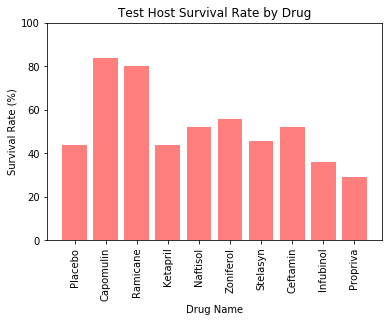

In [66]:
plt.title("Test Host Survival Rate by Drug")
plt.xlabel("Drug Name")
plt.ylabel("Survival Rate (%)")
survival_rate_data = [value for value in Drug_Survival_Rate]
x_axis = np.arange(0, len(survival_rate_data), 1)
tick_locations = [ticker for ticker in x_axis]
plt.ylim(0, 100)
plt.bar(x_axis, survival_rate_data, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, Drug_Names, rotation="vertical")
plt.show()


## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


            0
0  162.222222
1   47.916667
2   46.808511
3  173.333333
4  168.888889
5  162.222222
6  166.666667
7  151.111111
8  160.000000
9  160.000000


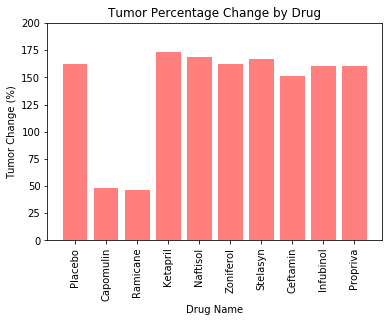

In [74]:
Placebo_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Placebo", ["Tumor Volume (mm3)"]]
Placebo_min_spread = np.min(Placebo_spread)
Placebo_max_spread = np.max(Placebo_spread)
Placebo_Percent_Change = int(Placebo_max_spread) / int(Placebo_min_spread) * 100
#print(f"{Placebo_Percent_Change}%")

Capomulin_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Capomulin", ["Tumor Volume (mm3)"]]
Capomulin_min_spread = np.min(Capomulin_spread)
Capomulin_max_spread = np.max(Capomulin_spread)
Capomulin_Percent_Change = int(Capomulin_min_spread) / int(Capomulin_max_spread) * 100
#print(f"{Capomulin_Percent_Change}%")

Ramicane_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Ramicane", ["Tumor Volume (mm3)"]]
Ramicane_min_spread = np.min(Ramicane_spread)
Ramicane_max_spread = np.max(Ramicane_spread)
Ramicane_Percent_Change = int(Ramicane_min_spread) / int(Ramicane_max_spread) * 100
#print(f"{Ramicane_Percent_Change}%")

Ketapril_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Ketapril", ["Tumor Volume (mm3)"]]
Ketapril_min_spread = np.min(Ketapril_spread)
Ketapril_max_spread = np.max(Ketapril_spread)
Ketapril_Percent_Change = int(Ketapril_max_spread) / int(Ketapril_min_spread) * 100
#print(f"{Ketapril_Percent_Change}%")

Naftisol_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Naftisol", ["Tumor Volume (mm3)"]]
Naftisol_min_spread = np.min(Naftisol_spread)
Naftisol_max_spread = np.max(Naftisol_spread)
Naftisol_Percent_Change = int(Naftisol_max_spread) / int(Naftisol_min_spread) * 100
#print(f"{Naftisol_Percent_Change}%")

Zoniferol_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Zoniferol", ["Tumor Volume (mm3)"]]
Zoniferol_min_spread = np.min(Zoniferol_spread)
Zoniferol_max_spread = np.max(Zoniferol_spread)
Zoniferol_Percent_Change = int(Zoniferol_max_spread) / int(Zoniferol_min_spread) * 100
#print(f"{Zoniferol_Percent_Change}%")

Stelasyn_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Stelasyn", ["Tumor Volume (mm3)"]]
Stelasyn_min_spread = np.min(Stelasyn_spread)
Stelasyn_max_spread = np.max(Stelasyn_spread)
Stelasyn_Percent_Change = int(Stelasyn_max_spread) / int(Stelasyn_min_spread) * 100
#print(f"{Stelasyn_Percent_Change}%")

Ceftamin_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Ceftamin", ["Tumor Volume (mm3)"]]
Ceftamin_min_spread = np.min(Ceftamin_spread)
Ceftamin_max_spread = np.max(Ceftamin_spread)
Ceftamin_Percent_Change = int(Ceftamin_max_spread) / int(Ceftamin_min_spread) * 100
#print(f"{Ceftamin_Percent_Change}%")

Infubinol_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Infubinol", ["Tumor Volume (mm3)"]]
Infubinol_min_spread = np.min(Infubinol_spread)
Infubinol_max_spread = np.max(Infubinol_spread)
Infubinol_Percent_Change = int(Infubinol_max_spread) / int(Infubinol_min_spread) * 100
#print(f"{Infubinol_Percent_Change}%")

Propriva_spread = drug_trial_data_df.loc[drug_trial_data_df["Drug"] == "Propriva", ["Tumor Volume (mm3)"]]
Propriva_min_spread = np.min(Propriva_spread)
Propriva_max_spread = np.max(Propriva_spread)
Propriva_Percent_Change = int(Propriva_max_spread) / int(Propriva_min_spread) * 100
#print(f"{Propriva_Percent_Change}%")


# Convert to DataFrame
Drug_Tumor_Change = [Placebo_Percent_Change, Capomulin_Percent_Change, Ramicane_Percent_Change, Ketapril_Percent_Change, Naftisol_Percent_Change, Zoniferol_Percent_Change, Stelasyn_Percent_Change, Ceftamin_Percent_Change, Infubinol_Percent_Change, Propriva_Percent_Change]
Tumor_Change_df = pd.DataFrame(Drug_Tumor_Change)

# Preview DataFrame
print(Tumor_Change_df)
plt.title("Tumor Percentage Change by Drug")
plt.xlabel("Drug Name")
plt.ylabel("Tumor Change (%)")
change_rate_data = [value for value in Drug_Tumor_Change]
x_axis = np.arange(0, len(change_rate_data), 1)
tick_locations = [ticker for ticker in x_axis]
plt.ylim(0, 200)
plt.bar(x_axis, change_rate_data, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, Drug_Names, rotation="vertical")
plt.show()